# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)
from lib.plots.data import (DataPlotType, stack, curve)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cumu import (CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [r"$μ^*=$" + f"{val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

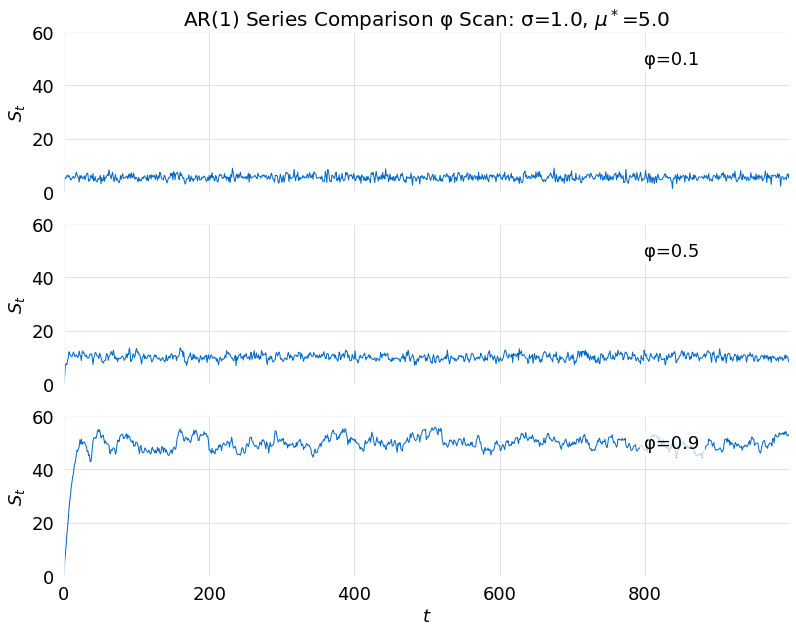

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

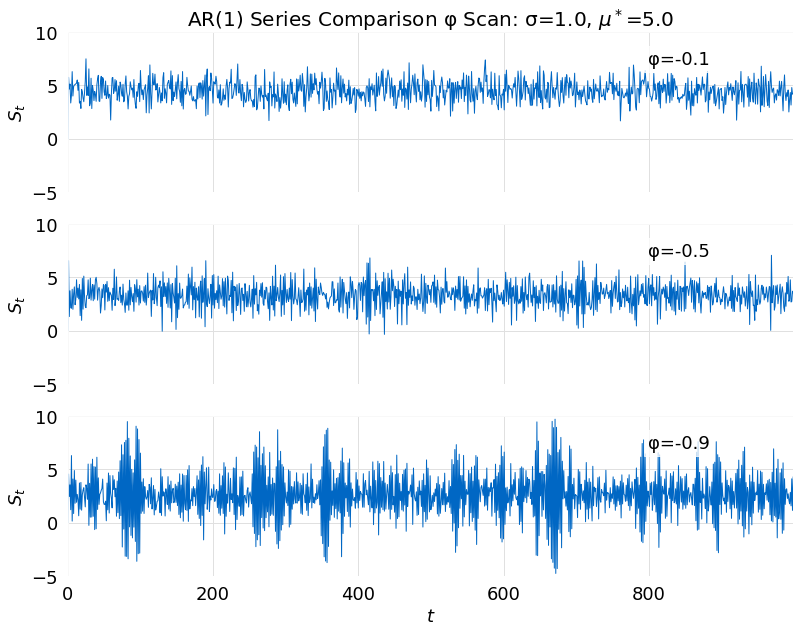

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu^*$ Scan

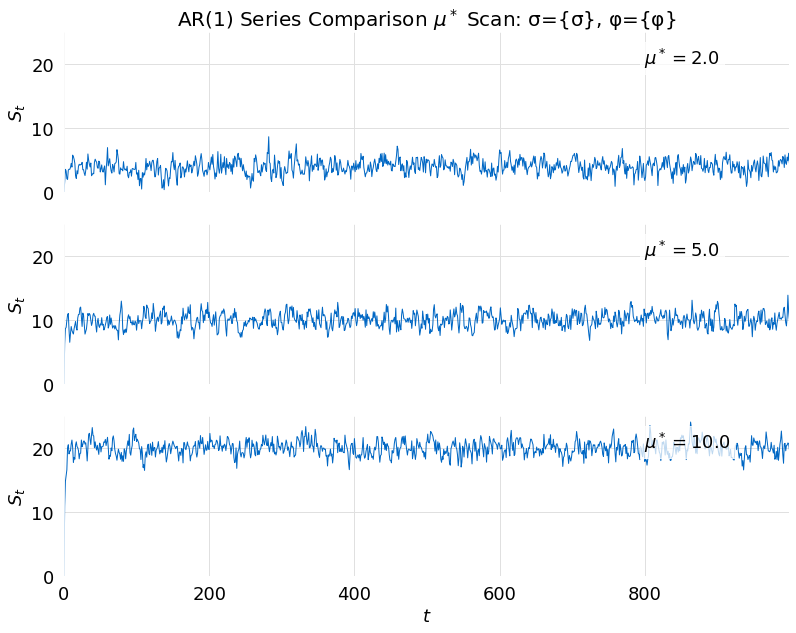

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

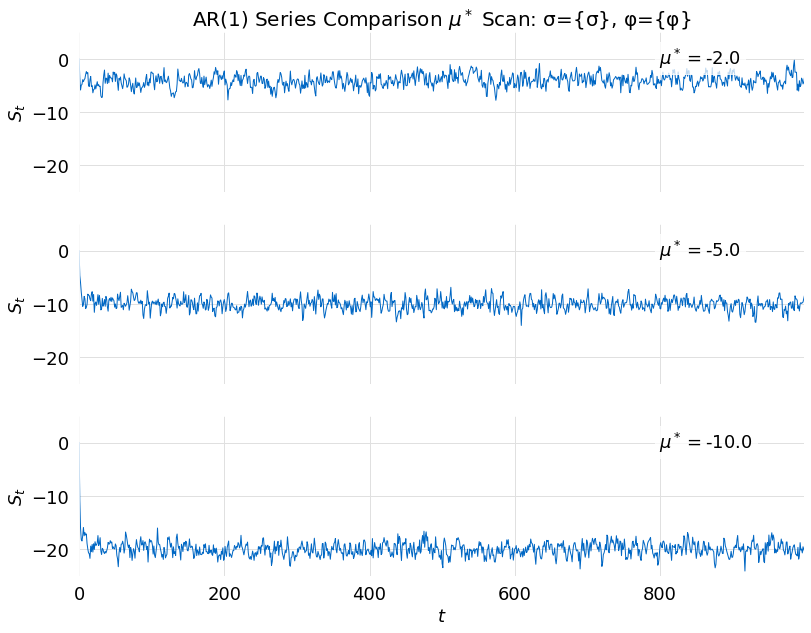

In [6]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

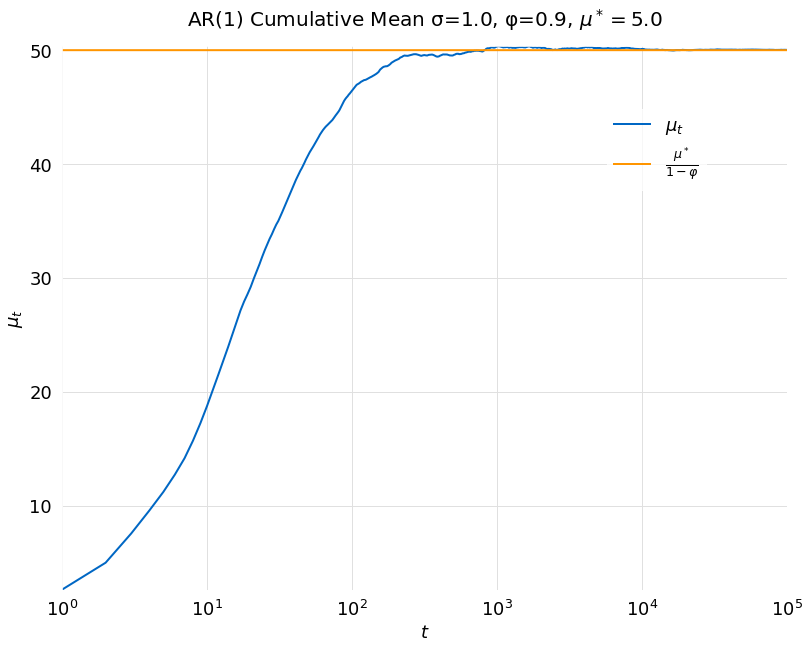

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

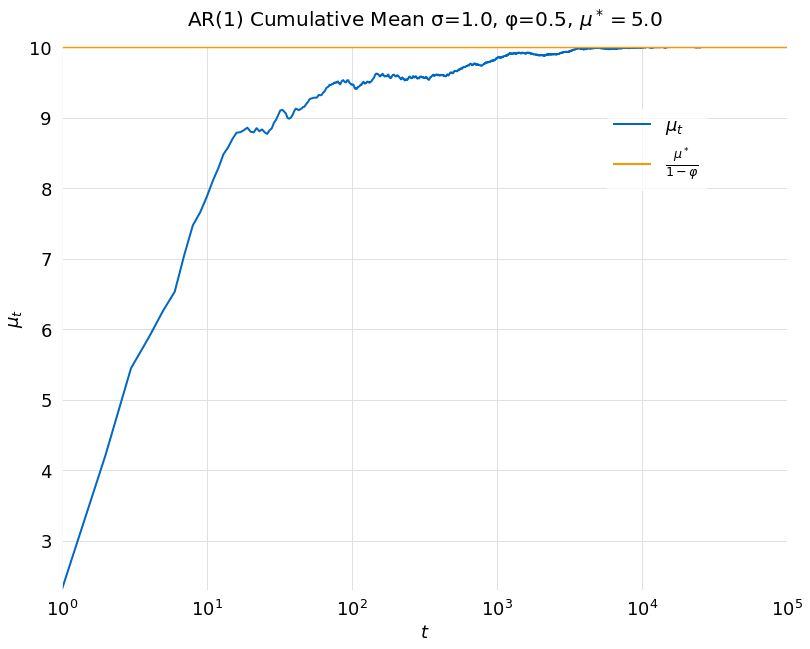

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

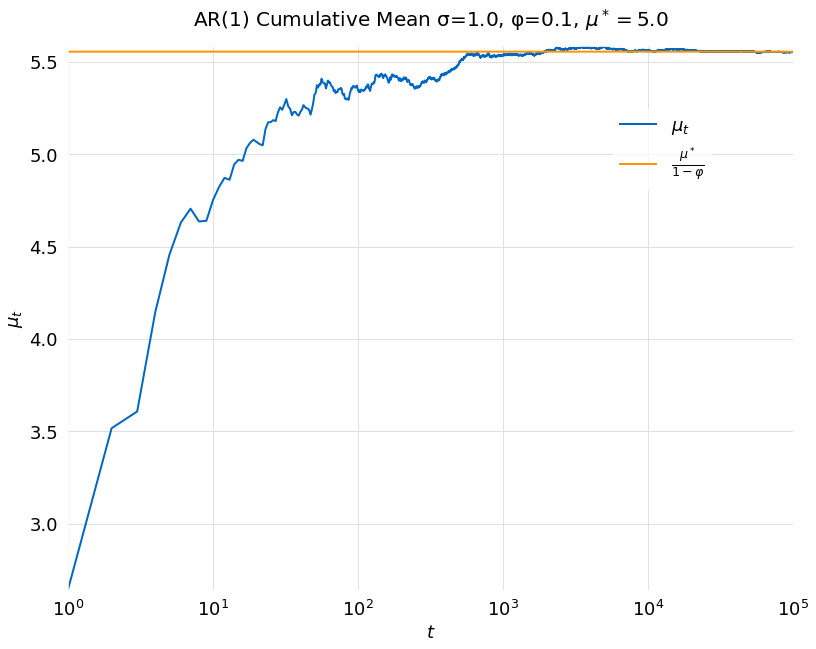

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

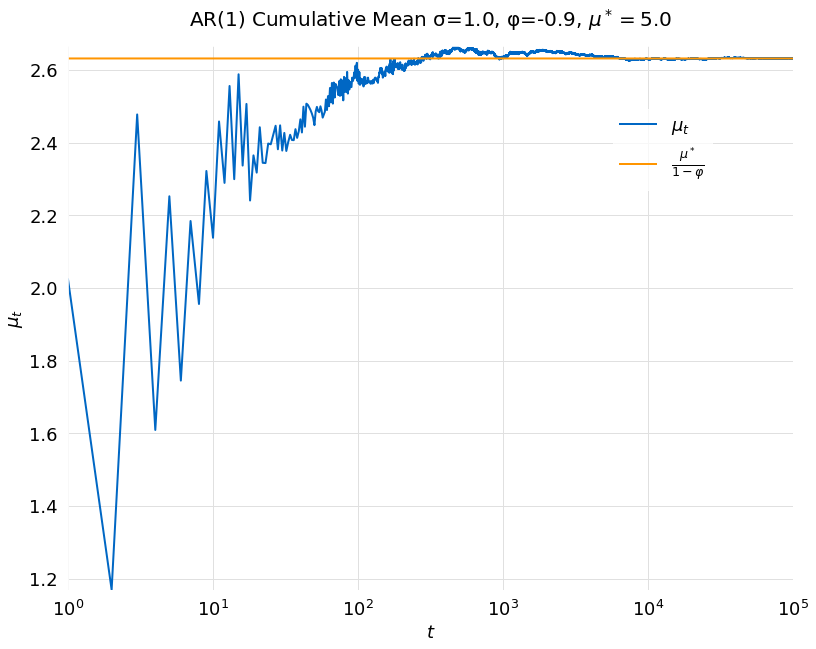

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

## Standard Deviation

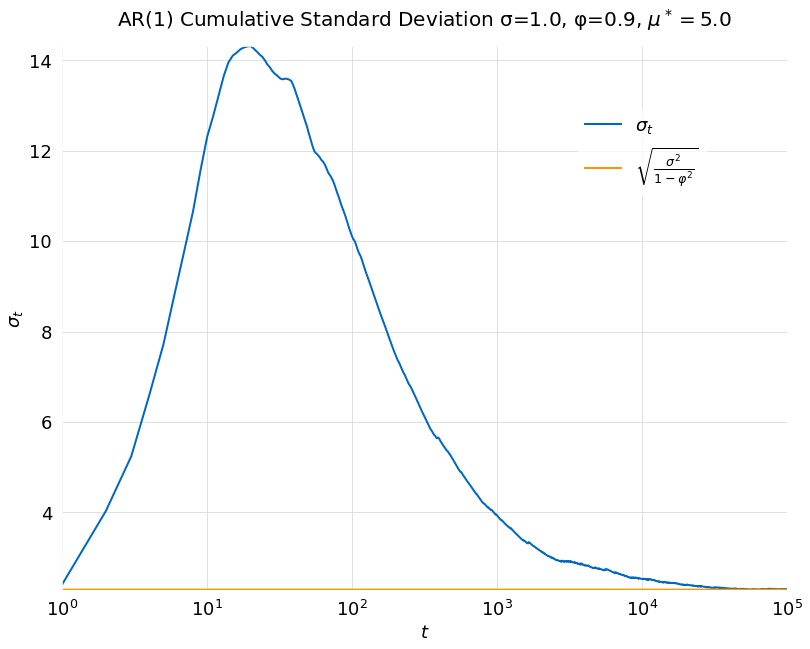

In [11]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

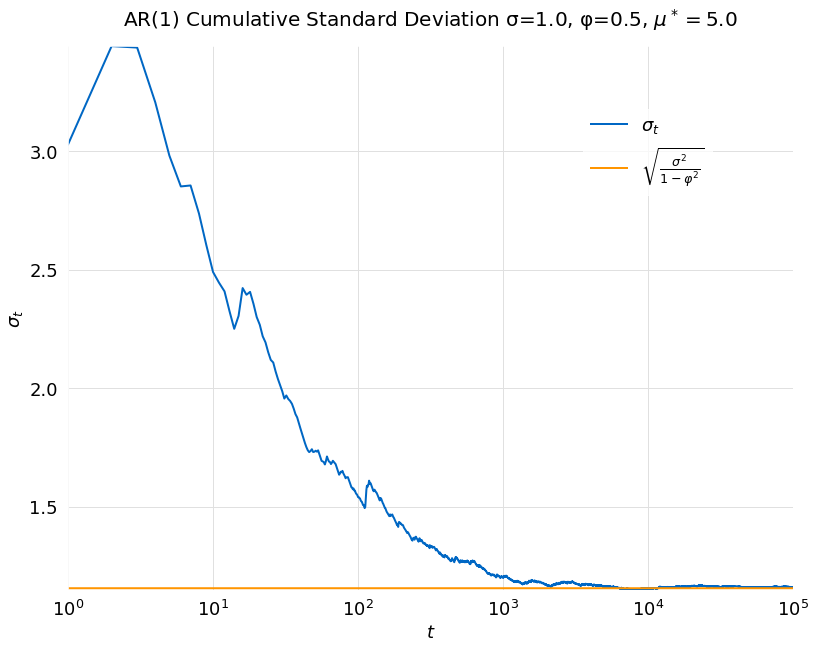

In [12]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

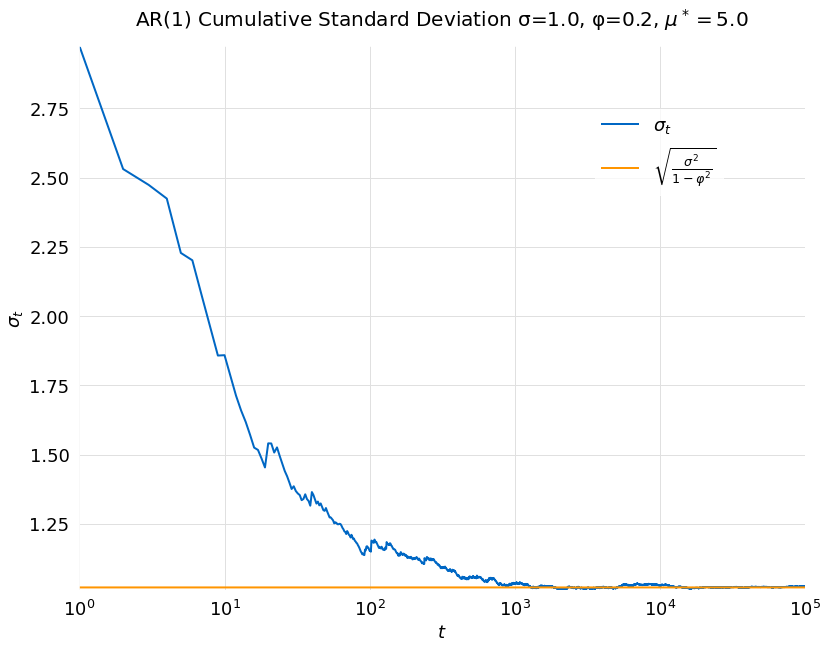

In [13]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

## Parameter Estimation

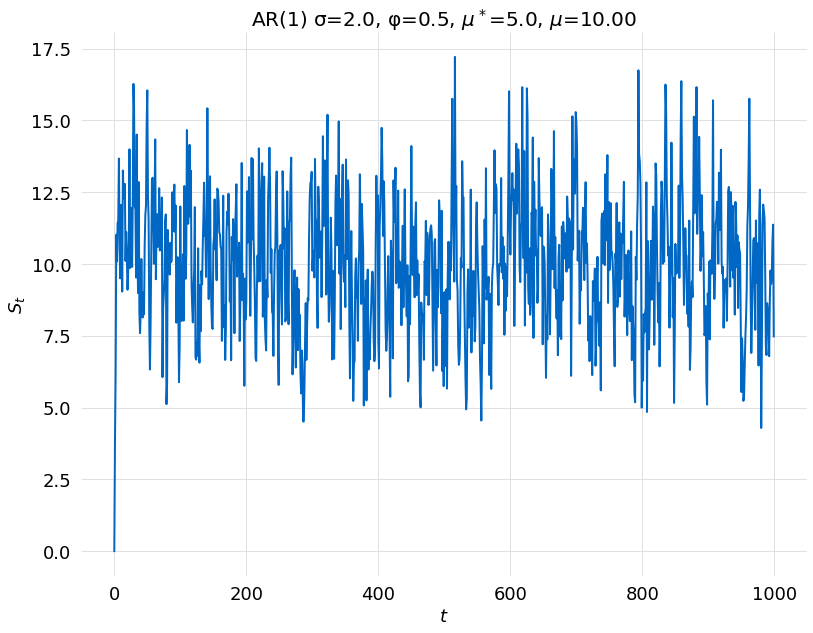

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2123.273
Date:                Wed, 27 Apr 2022   AIC                           4252.546
Time:                        20:20:13   BIC                           4267.269
Sample:                             0   HQIC                          4258.142
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0112      0.121     82.401      0.000       9.773      10.249
ar.L1          0.4827      0.027     17.588      0.000       0.429       0.536
sigma2         4.0890      0.174     23.469      0.000       3.748       4.430
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.29   Prob(JB):                         0.34
Heteroskedasticity (H):               0.95   Skew:                             0.03
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Label': 'SIM', 'Estimates': {'Const': [10.011166683350988, 0.1214928570541394], 'Parameters': [[0.48265655928593065, 0.027441841829518046]], 'Sigma2': [4.088992622102842, 0.17423260418146377]}}, 'Description': 'ARIMA(1,0,0) Series Simulation', 'Parameters': {'φ': [0.5], 'δ': [], 'σ': 2.0, 'μ': 5.0, 'γ': 0.0}, 'Date': '27/04/2022 20:20:13', 'name': 'ARMA-Simulation-e0a38b07-54ab-4724-bfee-e2c8740fcc38', 'tags': 'ARMA Simulation'}


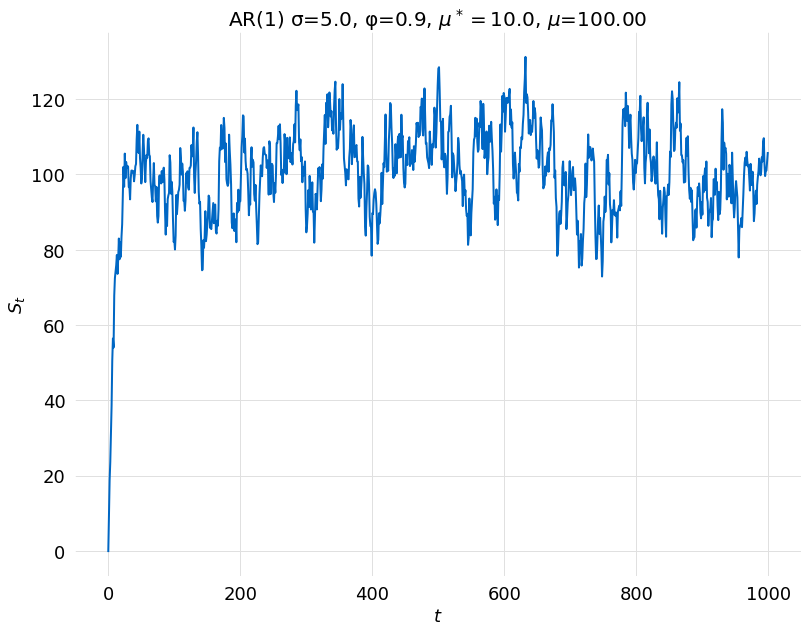

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [18]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3062.445
Date:                Wed, 27 Apr 2022   AIC                           6130.889
Time:                        20:20:13   BIC                           6145.613
Sample:                             0   HQIC                          6136.485
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.8214      2.566     38.508      0.000      93.792     103.851
ar.L1          0.9389      0.005    189.293      0.000       0.929       0.949
sigma2        26.7056      1.301     20.528      0.000      24.156      29.255
===================================================================================
Ljung-Box (L1) (Q):                   3.25   Jarque-Bera (JB):                90.29
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.30
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Label': 'SIM', 'Estimates': {'Const': [98.82141791758315, 2.5662556011153637], 'Parameters': [[0.938904201658576, 0.004960067803794187]], 'Sigma2': [26.705631254481933, 1.300909473926854]}}, 'Description': 'ARIMA(1,0,0) Series Simulation', 'Parameters': {'φ': [0.9], 'δ': [], 'σ': 5.0, 'μ': 10.0, 'γ': 0.0}, 'Date': '27/04/2022 20:20:13', 'name': 'ARMA-Simulation-5c6a8ffb-980a-4064-8490-94a885f88125', 'tags': 'ARMA Simulation'}


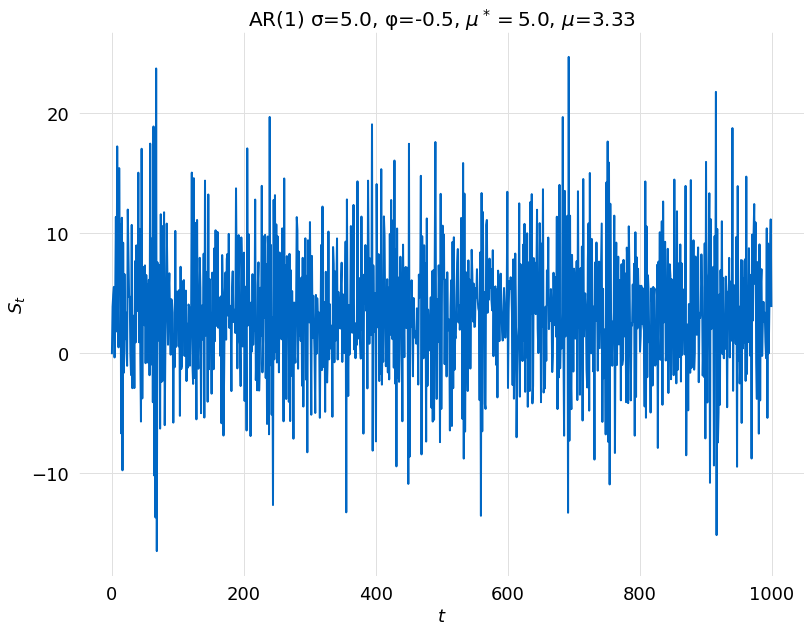

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [21]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3022.637
Date:                Wed, 27 Apr 2022   AIC                           6051.275
Time:                        20:20:13   BIC                           6065.998
Sample:                             0   HQIC                          6056.871
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4446      0.104     33.109      0.000       3.241       3.649
ar.L1         -0.5111      0.027    -19.240      0.000      -0.563      -0.459
sigma2        24.7074      1.042     23.717      0.000      22.666      26.749
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.80   Prob(JB):                         0.24
Heteroskedasticity (H):               0.97   Skew:                             0.02
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print(df.attrs)

{'S(t)': {'npts': 1000, 'DataType': <DataType.TIME_SERIES: 2>, 'Label': 'SIM', 'Estimates': {'Const': [3.4446219802933955, 0.10403962351718365], 'Parameters': [[-0.5111256335499275, 0.026565535938595182]], 'Sigma2': [24.7074196143537, 1.0417632397113132]}}, 'Description': 'ARIMA(1,0,0) Series Simulation', 'Parameters': {'φ': [-0.5], 'δ': [], 'σ': 5.0, 'μ': 5.0, 'γ': 0.0}, 'Date': '27/04/2022 20:20:13', 'name': 'ARMA-Simulation-8c8aaf07-69ba-44f5-a413-3c5a36e433a4', 'tags': 'ARMA Simulation'}
